# Question 6: Computing GC Content
***

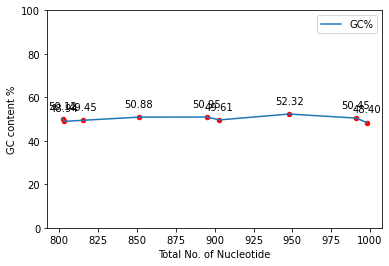

In [2]:
# Library 
import pandas as pd
import matplotlib.pyplot as plt

# Data Import: 
with open("Input_Data/Attempt1.txt") as f: 
    file = [line.rstrip() for line in f]

# Analysis: 
df = pd.DataFrame(columns = ["Cluster", "strand"])

index=0

for num, i in enumerate(file): 
    if i[0]=='>':                                                # Look for the line starting with >
        df = df.append({"Cluster": i[1::]}, ignore_index=True)   # appends the cluster name 
        strand=''                                                # resets the strand for each cluster 
        index += 1                                               # Add 1 to index which is used to append the strand for each cluster
    else:                                                        # executes every time it doesnt see >, so for all the other lines. 
        strand += i                                              # adds up the strand until the next cluster is seen 
        df['strand'][index-1] = strand                           # everytime overrides the strand, until it sees the next cluster name. 

df['length'] = 0 
df['A_count'] = 0 
df['T_count'] = 0 
df['G_count'] = 0 
df['C_count'] = 0 
df['GC%'] = 0

for index, row in df.iterrows(): 
    df.loc[index, 'length'] = len(row['strand'])
    df.loc[index, 'A_count'] = row['strand'].count('A')
    df.loc[index, 'T_count'] = row['strand'].count('T')
    df.loc[index, 'G_count'] = row['strand'].count('G')
    df.loc[index, 'C_count'] = row['strand'].count('C')
    df.loc[index, 'GC%'] = ((row['strand'].count('G') + row['strand'].count('C'))/len(row['strand'])) * 100  #((G+C)/Total)*100


df_highest = df.nlargest(1, 'GC%')

# Data Output: 
outF = open("Output_Data/OutputAttempt1.txt", "w")
for i, row in df_highest.iterrows():
    outF.write(row['Cluster'])
    outF.write('\n')
    outF.write(str(row['GC%']))
outF.close()

#--------------------------------------------------------------------

# Data Visualization: 

df = df.sort_values(by=['length'])

ax = plt.gca()
df.plot(kind='scatter',x='length',y='GC%',color='red', ylim=(0,100), ax=ax)
df.plot(kind='line',x='length',y='GC%', ylim=(0,100), ax=ax)

for x,y in zip(df['length'], df['GC%']):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.xlabel('Total No. of Nucleotide')
plt.ylabel('GC content %')   
    
plt.savefig("Visualization/Attempt1.png")
